In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [41]:
directory=os.getcwd
print(directory)

<built-in function getcwd>


In [42]:
os.path.realpath('Win_Prediction_Data.xlsx - Sheet1.csv') 

'C:\\Users\\well\\Downloads\\Win_Prediction_Data.xlsx - Sheet1.csv'

In [43]:
os.chdir('C:\\Users\\well\\Downloads')

In [44]:
df= pd.read_csv('Win_Prediction_Data.xlsx - Sheet1.csv')

In [45]:
df1=df.copy()

In [46]:
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


<!-- ##### Data preprocessing
# Checking null values and outliers
# Encoding-Label encoding ,one hot encoding and dummy variables
# Feature Scaling-Normalisation and Standardisation
# Removing the non significant variables
# Balancing the imbalanced dataset(This is applicable for classifiction problem)
# Duplicate data -->

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Client Category   9982 non-null   object 
 1   Solution Type     10061 non-null  object 
 2   Deal Date         10061 non-null  object 
 3   Sector            10061 non-null  object 
 4   Location          10061 non-null  object 
 5   VP Name           10061 non-null  object 
 6   Manager Name      10061 non-null  object 
 7   Deal Cost         10061 non-null  float64
 8   Deal Status Code  10061 non-null  object 
dtypes: float64(1), object(8)
memory usage: 707.5+ KB


In [48]:
df1.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

<AxesSubplot:>

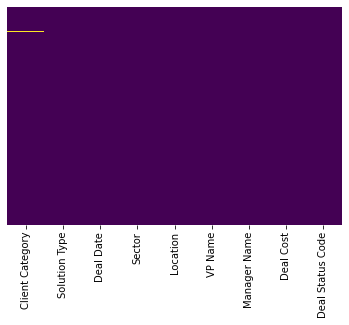

In [49]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis') #to see missing values

In [50]:
df1['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [51]:
df1['Client Category']=df1['Client Category'].fillna('Others ')

In [52]:
df1.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

<AxesSubplot:>

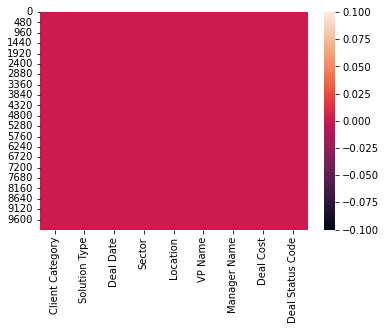

In [53]:
sns.heatmap(df1.isnull())

In [54]:
df1.describe(include='O') #"o" helps to include all object type


,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061,10061
unique,42,67,2555,25,13,43,278,2
top,Others,Solution 32,27-Jul-18,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1763,1439,15,2693,3360,1166,323,6306


In [55]:
Client_Category=df1['Client Category'].value_counts()

<AxesSubplot:>

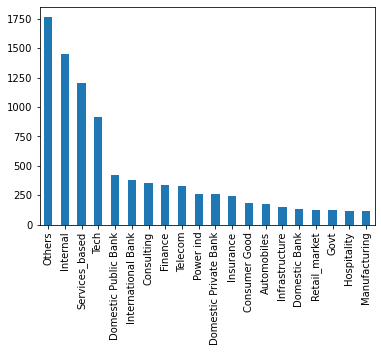

In [56]:
Client_Category[:20].plot(kind='bar')

<AxesSubplot:>

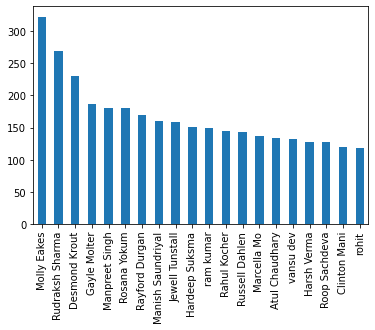

In [57]:
Manager_Name=df1["Manager Name"].value_counts()
Manager_Name[:20].plot(kind='bar')

<AxesSubplot:>

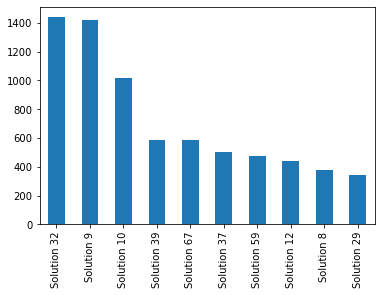

In [58]:
Solution_Type=df1['Solution Type'].value_counts()
Solution_Type[:10].plot(kind='bar')

<AxesSubplot:>

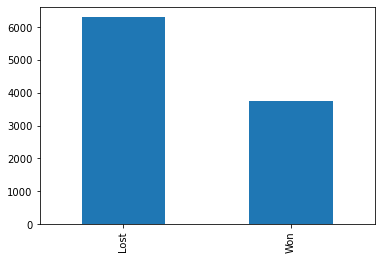

In [59]:
Deal_Status_Code=df1['Deal Status Code'].value_counts()
Deal_Status_Code[:10].plot(kind='bar')

## checking the relation between different variables


In [60]:
rel_client_category=df1[['Client Category','Deal Status Code']].groupby(['Client Category','Deal Status Code']).size().reset_index().rename(columns={0:"Deal Status Count"})
rel_client_category

,Client Category,Deal Status Code,Deal Status Count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
79,Tech,Won,313
80,Telecom,Lost,192
81,Telecom,Won,135
82,e-commerce,Lost,20


In [61]:
rel_Solution_Type=df1[['Solution Type','Deal Status Code']].groupby(['Solution Type','Deal Status Code']).size().reset_index().rename(columns={0:"Deal Status Count"})
rel_Solution_Type


,Solution Type,Deal Status Code,Deal Status Count
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [62]:
rel_VP_Name=df1[['VP Name','Deal Status Code']].groupby(['VP Name','Deal Status Code']).size().reset_index().rename(columns={0:"Deal Status Count"})
rel_VP_Name

,VP Name,Deal Status Code,Deal Status Count
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


In [63]:
rel_Manager_Name=df1[['Manager Name','Deal Status Code']].groupby(['Manager Name','Deal Status Code']).size().reset_index().rename(columns={0:"Deal Status Count"})
rel_Manager_Name

,Manager Name,Deal Status Code,Deal Status Count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [64]:
df1['Deal_Date_year']=pd.to_datetime(df1['Deal Date']).dt.year
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


In [65]:
df1['Deal_Date_year'].value_counts()

2018    2120
2017    1738
2015    1669
2016    1637
2014    1157
2013     829
2012     582
2019     244
2011      85
Name: Deal_Date_year, dtype: int64

<AxesSubplot:xlabel='Deal_Date_year', ylabel='Count'>

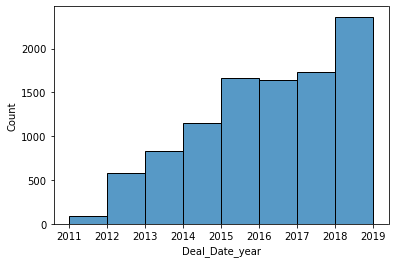

In [66]:
sns.histplot(df1['Deal_Date_year'],bins=8)

In [67]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
df1['Client Category'] = label_encoder.fit_transform(df1['Client Category'])
df1['Solution Type'] = label_encoder.fit_transform(df1['Solution Type'])
df1['Sector'] = label_encoder.fit_transform(df1['Sector'])
df1['Location'] = label_encoder.fit_transform(df1['Location'])
df1['VP Name'] = label_encoder.fit_transform(df1['VP Name'])
df1['Manager Name'] = label_encoder.fit_transform(df1['Manager Name'])
df1['Deal Status Code'] = label_encoder.fit_transform(df1['Deal Status Code'])

In [68]:
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,40,64,27-Mar-12,16,7,6,82,150000.00,1,2012
1,40,64,25-Sep-12,16,7,6,82,744705.88,1,2012
2,19,54,1-Aug-11,12,12,6,183,60000.00,0,2011
3,19,54,28-Apr-11,12,12,6,183,60000.00,0,2011
4,19,25,3-Jun-11,12,12,6,183,80882.35,0,2011


In [69]:
df1['Deal Status Code'].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

# split into dependent and independent variable

In [70]:
x=df1.drop(['Deal Status Code'],axis=1)
y=df1['Deal Status Code']

In [71]:
x

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_year
0,40,64,27-Mar-12,16,7,6,82,150000.00,2012
1,40,64,25-Sep-12,16,7,6,82,744705.88,2012
2,19,54,1-Aug-11,12,12,6,183,60000.00,2011
3,19,54,28-Apr-11,12,12,6,183,60000.00,2011
4,19,25,3-Jun-11,12,12,6,183,80882.35,2011
...,...,...,...,...,...,...,...,...,...
10056,32,66,18-Mar-19,24,7,29,182,588235.29,2019
10057,19,55,4-Mar-19,12,12,29,198,777058.82,2019
10058,32,66,28-Feb-19,24,7,29,182,588235.29,2019
10059,32,58,27-Jan-19,24,7,19,50,3042058.82,2019


In [72]:
y

0        1
1        1
2        0
3        0
4        0
        ..
10056    0
10057    1
10058    0
10059    1
10060    0
Name: Deal Status Code, Length: 10061, dtype: int32

In [73]:
x=x.drop(['Deal Date','Deal_Date_year'],axis=1)


In [74]:
x

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,40,64,16,7,6,82,150000.00
1,40,64,16,7,6,82,744705.88
2,19,54,12,12,6,183,60000.00
3,19,54,12,12,6,183,60000.00
4,19,25,12,12,6,183,80882.35
...,...,...,...,...,...,...,...
10056,32,66,24,7,29,182,588235.29
10057,19,55,12,12,29,198,777058.82
10058,32,66,24,7,29,182,588235.29
10059,32,58,24,7,19,50,3042058.82


In [75]:
feature_list = list(x.columns)

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)


In [77]:
x1.shape

(10061, 7)

In [78]:
y.shape

(10061,)

Split data into training and test

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,train_size=0.8,random_state=42)

# Using Logistic Regression Model

In [101]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(class_weight = 'balanced',max_iter=200, random_state=2000) 
logit.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=2000)

In [102]:
y_pred_test=logit.predict(x_test) #predicting on the testing data
y_pred_train=logit.predict(x_train) #predicting on training dat

In [103]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_roc_curve , roc_curve ,roc_auc_score

# Evaluating the logistic regression model

In [104]:
print(confusion_matrix(y_train,y_pred_train))
print('*'*50)
print(confusion_matrix(y_test,y_pred_test))

[[2756 2298]
 [1513 1481]]
**************************************************
[[666 586]
 [372 389]]


In [105]:
print(classification_report(y_train,y_pred_train))
print('*'*50)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59      5054
           1       0.39      0.49      0.44      2994

    accuracy                           0.53      8048
   macro avg       0.52      0.52      0.51      8048
weighted avg       0.55      0.53      0.53      8048

**************************************************
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1252
           1       0.40      0.51      0.45       761

    accuracy                           0.52      2013
   macro avg       0.52      0.52      0.51      2013
weighted avg       0.55      0.52      0.53      2013



In [106]:
print(accuracy_score(y_train,y_pred_train))
print('*'*50)
print(accuracy_score(y_test,y_pred_test))

0.5264662027833003
**************************************************
0.524093392945852


# The model's f1 score is very low and also the AUC-ROC curve is also showing only 54% area
# This shows that our model is not predicting well. Both training and testing accuracy is low. 
# So trying cross validation to improve the prediction capacity

In [107]:
from sklearn.model_selection import cross_val_score,GridSearchCV
cross_train= cross_val_score(logit,x_train,y_train,cv=10)
cross_test= cross_val_score(logit,x_test,y_test,cv=10)
print(cross_train)
print(cross_test)

[0.51428571 0.53664596 0.53664596 0.51677019 0.50931677 0.51180124
 0.53043478 0.5378882  0.50621891 0.54726368]
[0.55445545 0.53960396 0.51485149 0.49253731 0.52238806 0.48756219
 0.50248756 0.56218905 0.55223881 0.51741294]


In [110]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
#Let’s first fit a random forest with default parameters to get a baseline idea of the performance

RandomForestClassifier()

In [111]:
y_predict_rf_train=rf.predict(x_train)
y_predict_rf_test=rf.predict(x_test)

In [112]:
print(len(rf.estimators_))

100


In [113]:
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [114]:
# Pull out one tree from the forest
from sklearn.tree import export_graphviz
import pydotplus 
import pydot
tree = rf.estimators_[10]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [115]:
from PIL import Image
img = Image.open('tree.png')
img.show()

In [116]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

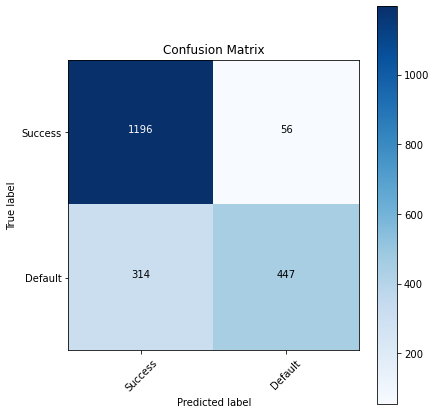

In [117]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_predict_rf_test, normalize=False)
plt.show()

In [118]:
print(confusion_matrix(y_train,y_predict_rf_train))
print('*'*50)
print(confusion_matrix(y_test,y_predict_rf_test))

[[5052    2]
 [  20 2974]]
**************************************************
[[1196   56]
 [ 314  447]]


In [119]:
print(classification_report(y_train,y_predict_rf_train))
print('*'*50)
print(classification_report(y_test,y_predict_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5054
           1       1.00      0.99      1.00      2994

    accuracy                           1.00      8048
   macro avg       1.00      1.00      1.00      8048
weighted avg       1.00      1.00      1.00      8048

**************************************************
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1252
           1       0.89      0.59      0.71       761

    accuracy                           0.82      2013
   macro avg       0.84      0.77      0.79      2013
weighted avg       0.83      0.82      0.81      2013



In [120]:
print(accuracy_score(y_train,y_predict_rf_train))
print('*'*50)
print(accuracy_score(y_test,y_predict_rf_test))

0.9972664015904572
**************************************************
0.8161947342275211


We see that our model overfits . The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data. So we try to improve testing accuracy by cross validation.

In [121]:
cross_test= cross_val_score(rf,x_test,y_test,cv=20)
print(cross_train)
print(cross_test)

[0.51428571 0.53664596 0.53664596 0.51677019 0.50931677 0.51180124
 0.53043478 0.5378882  0.50621891 0.54726368]
[0.71287129 0.74257426 0.7029703  0.7029703  0.68316832 0.68316832
 0.71287129 0.74257426 0.75247525 0.62376238 0.7029703  0.74257426
 0.66336634 0.68       0.66       0.75       0.68       0.77
 0.69       0.69      ]


There is no improvement so let us see how we can change the parameters and tune the model


In [122]:
for max_d in range(1,21):
  rf.set_params(max_depth=max_d, random_state=42)
  rf.fit(x_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), rf.score(x_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), rf.score(x_test,y_test))
  print('')

The Training Accuracy for max_depth 1 is: 0.6279821073558648
The Validation Accuracy for max_depth 1 is: 0.6219572776949827

The Training Accuracy for max_depth 2 is: 0.6279821073558648
The Validation Accuracy for max_depth 2 is: 0.6219572776949827

The Training Accuracy for max_depth 3 is: 0.6340705765407555
The Validation Accuracy for max_depth 3 is: 0.6279185295578739

The Training Accuracy for max_depth 4 is: 0.6504721669980119
The Validation Accuracy for max_depth 4 is: 0.6383507203179334

The Training Accuracy for max_depth 5 is: 0.676565606361829
The Validation Accuracy for max_depth 5 is: 0.6626924987580726

The Training Accuracy for max_depth 6 is: 0.6996769383697813
The Validation Accuracy for max_depth 6 is: 0.6726279185295578

The Training Accuracy for max_depth 7 is: 0.717072564612326
The Validation Accuracy for max_depth 7 is: 0.6780923994038748

The Training Accuracy for max_depth 8 is: 0.7398111332007953
The Validation Accuracy for max_depth 8 is: 0.6915052160953801

Th

We can see that after depth 6 there is over fitting.
Hyper-Parameter Optimization using GridSearchCV

In [123]:
np.random.seed(42)

param_dist = {'max_depth': [6],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}


In [124]:
# Set best parameters given by grid search 
rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 6,
                 bootstrap= True)

RandomForestClassifier(max_depth=6, random_state=42)

OOB Rate

In [125]:
rf.set_params(oob_score=True)

min_estimators = 100
max_estimators = 300

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(x_train,y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [126]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

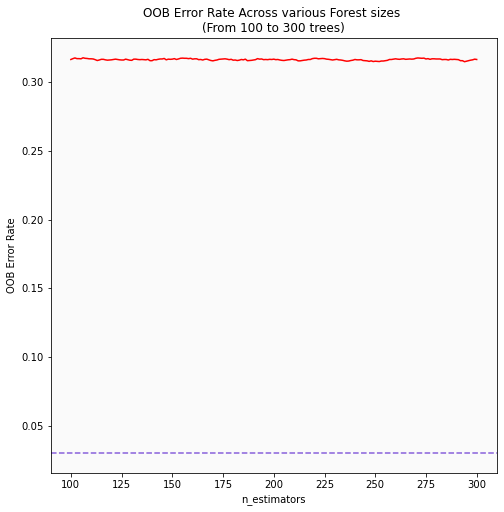

In [127]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 300 trees)')
plt.show()

In [129]:
print('OOB Error rate for 110 trees is: {0:.5f}'.format(oob_series[110]))

OOB Error rate for 110 trees is: 0.31710


In [130]:
print('OOB Error rate for 122 trees is: {0:.5f}'.format(oob_series[122]))

OOB Error rate for 122 trees is: 0.31685


In [131]:
# Refine the tree via OOB Output
rf.set_params(n_estimators=122,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=6, n_estimators=122, random_state=42)

In [132]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=122, random_state=42)

In [133]:
y_pred_rf_train = rf.predict(x_train) 
y_pred_rf_test = rf.predict(x_test)


In [134]:
print(classification_report(y_train,y_pred_rf_train))
print('*'*50)
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      5054
           1       0.83      0.24      0.38      2994

    accuracy                           0.70      8048
   macro avg       0.76      0.61      0.59      8048
weighted avg       0.74      0.70      0.64      8048

**************************************************
              precision    recall  f1-score   support

           0       0.66      0.96      0.78      1252
           1       0.75      0.20      0.32       761

    accuracy                           0.67      2013
   macro avg       0.71      0.58      0.55      2013
weighted avg       0.69      0.67      0.61      2013



In [135]:
print(accuracy_score(y_train,y_pred_rf_train))
print('*'*50)
print(accuracy_score(y_test,y_pred_rf_test))

0.7001739562624254
**************************************************
0.6721311475409836


In [136]:
y_score = rf.predict_proba(x_test)[:,1]  #storing the predicted class by the model and we will use it to get the ROC AUC score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score))

roc_auc_score for Random Forest:  0.7209767919292338


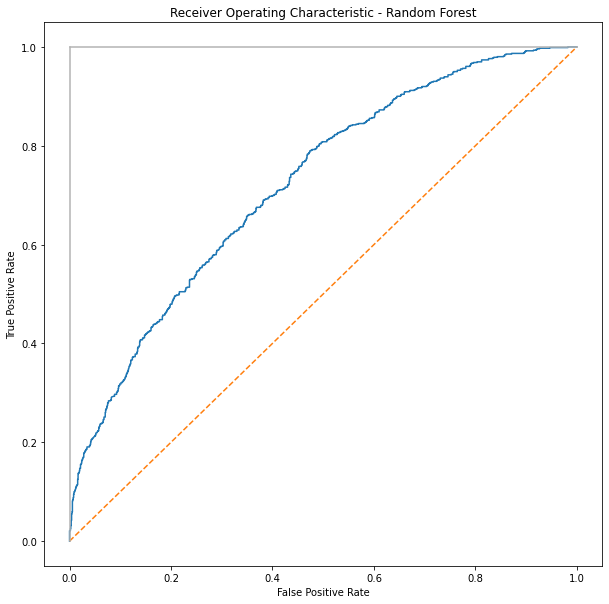

In [137]:
plt.subplots(figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random forest model is not giving a good accuracy so we try to predict using XGBoost .

In [80]:
from xgboost import XGBClassifier
xgb_class = XGBClassifier()
xgb_class.fit(x_train,y_train)

[17:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred_xgb_train = xgb_class.predict(x_train) 
y_pred_xgb_test = xgb_class.predict(x_test)


In [50]:
print(classification_report(y_train,y_pred_xgb_train))
print('*'*50)
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5054
           1       0.94      0.84      0.89      2994

    accuracy                           0.92      8048
   macro avg       0.93      0.91      0.91      8048
weighted avg       0.92      0.92      0.92      8048

**************************************************
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1252
           1       0.77      0.61      0.68       761

    accuracy                           0.78      2013
   macro avg       0.78      0.75      0.76      2013
weighted avg       0.78      0.78      0.78      2013



In [51]:
print(accuracy_score(y_train,y_pred_xgb_train))
print('*'*50)
print(accuracy_score(y_test,y_pred_xgb_test))

0.9222166998011928
**************************************************
0.7819175360158966


The model is overfitting so we try to reduce overfitting by tuning the model.

In [36]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [83]:
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
random_search = RandomizedSearchCV(xgb_class,param_distributions=params,n_iter=5 , scoring='roc_auc',cv=10,verbose=3)

In [84]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[17:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=0.781 total time=   0.3s
[17:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7;, score=0.804 total time=   0.3s
[17:13:18] WARNING: C:/Users/Administrator/workspace/xg

[17:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=7;, score=0.789 total time=   0.1s
[17:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1;, score=0.794 total time=   0.4s
[17:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGB

[CV 8/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5;, score=0.818 total time=   0.2s
[17:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5;, score=0.820 total time=   0.2s
[17:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5;, score=0.822 total

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estima...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [85]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [90]:
xgb_class = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [91]:
xgb_class.fit(x_train,y_train)

[17:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [92]:
y_pred_xgb_train = xgb_class.predict(x_train) 
y_pred_xgb_test = xgb_class.predict(x_test)


In [138]:
print(classification_report(y_train,y_pred_xgb_train))
print('*'*60)
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.88      5054
           1       0.86      0.66      0.75      2994

    accuracy                           0.83      8048
   macro avg       0.84      0.80      0.81      8048
weighted avg       0.84      0.83      0.83      8048

************************************************************
              precision    recall  f1-score   support

           0       0.75      0.89      0.82      1252
           1       0.74      0.52      0.61       761

    accuracy                           0.75      2013
   macro avg       0.75      0.71      0.72      2013
weighted avg       0.75      0.75      0.74      2013



In [96]:
print(accuracy_score(y_train,y_pred_xgb_train))
print('*'*50)
print(accuracy_score(y_test,y_pred_xgb_test))

0.8341202783300199
**************************************************
0.7511177347242921


In [97]:
y_score = xgb_class.predict_proba(x_test)[:,1]  #storing the predicted class by the model and we will use it to get the ROC AUC score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_score))

roc_auc_score for XGBoost:  0.819018086173817


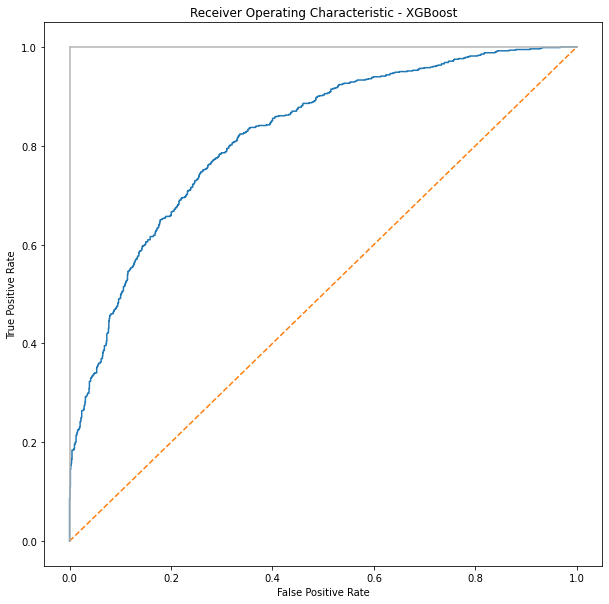

In [98]:
plt.subplots(figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# We see that training f1 score and accuracy has increased drastically but our testing accuracy is still a bit low. 
# we can try to improve it using cross validation

In [108]:
cross_test= cross_val_score(xgb_class,x_test,y_test,cv=20)
print(cross_test)

[17:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [109]:
cross_test[11]  ##we were able to improve testing accuracy by cross validation from 75% to 78%

0.7821782178217822

Summary
In this notebook we learned how to get data from the csv file, analyze the data (we learned some very interesting facts ), how to build a machine learning model to predict for unseen data from this data set and how to improve its performance (even though there was only a slight improvement). We used XGBoost for predicting and evaluated its result.XGBoost has given us the best accuracy so we recommend to use this model.